# :red_car:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

In [49]:
data1 = pd.read_csv("../data/raw/Train.csv")
data2 = pd.read_csv("../data/raw/Test.csv")
rawdata = pd.concat([data1,data2])


In [51]:
rawdata.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [52]:
rawdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


We have 10,695 total rows and 10 columns

7 categorical:

    Gender of the customer
    Marital status of the customer
    Is the customer a graduate?
    Profession of the customer
    Spending score of the customer
    Var_1: Anonymised Category for the customer

4 numerical:

    ID
    Age of customer
    Work Experience in years
    Number of family members for the customer (including the customer)



    Segmentation (target)

## Basic EDA of the categorical data

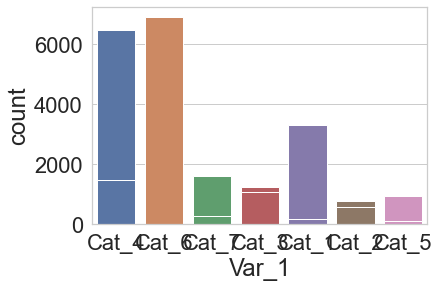

In [53]:
sns.countplot(data=rawdata, x='Gender')
sns.countplot(data=rawdata, x='Ever_Married')
sns.countplot(data=rawdata, x='Graduated')
sns.countplot(data=rawdata, x='Profession')
sns.countplot(data=rawdata, x='Spending_Score')
sns.countplot(data=rawdata, x='Var_1')


## Married

In [12]:
data_for_segmentation['Ever_Married'].unique()


array(['No', 'Yes'], dtype=object)

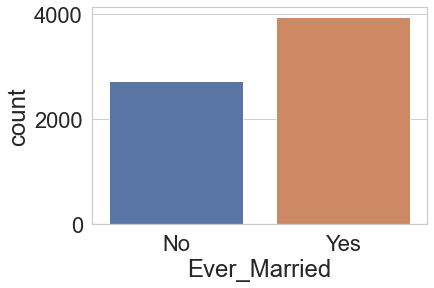

In [45]:
sns.countplot(data=data_for_segmentation, x='Ever_Married')


## Age

In [14]:
data_for_segmentation['Age'].isna().sum()


0

In [15]:
data_for_segmentation['Age'].unique()


array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88])

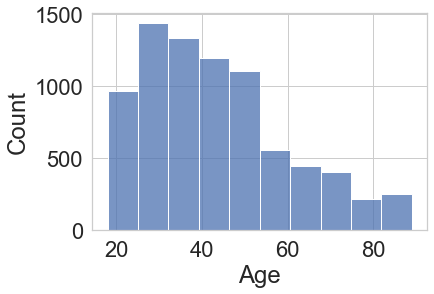

In [16]:
sns.histplot(data=data_for_segmentation,x='Age',bins=10)


## Graduated

In [18]:
data_for_segmentation['Graduated'].isna().sum()

74

In [19]:
data_for_segmentation['Graduated'].unique()


array(['No', 'Yes', nan], dtype=object)

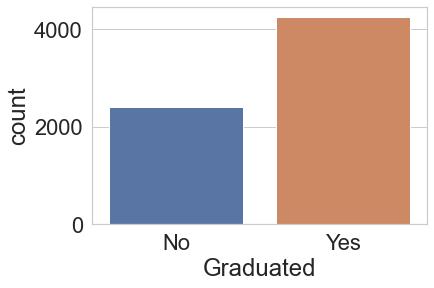

In [46]:
sns.countplot(data=data_for_segmentation, x='Graduated')


## Profession

In [22]:
data_for_segmentation['Profession'].isna().sum()


113

In [23]:
data_for_segmentation['Profession'].unique()


array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

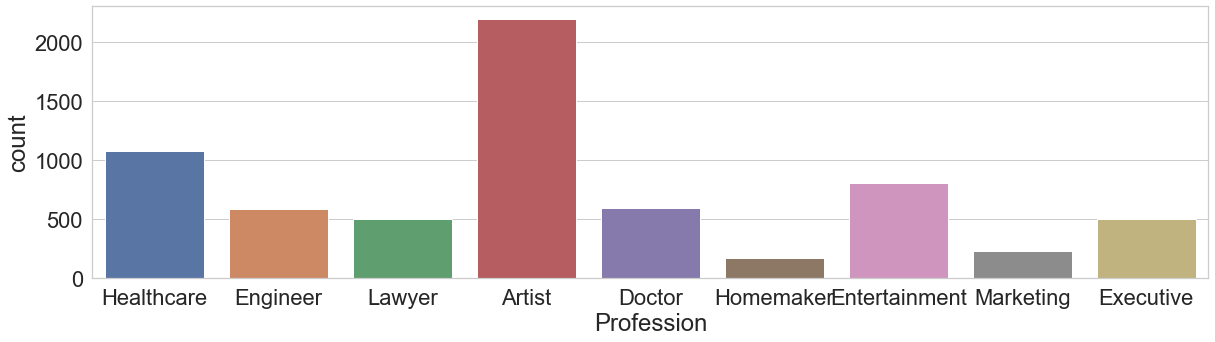

In [48]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=data_for_segmentation, x='Profession',ax=ax)


## Work_Experience

In [25]:
data_for_segmentation['Work_Experience'].isna().sum()


772

In [26]:
data_for_segmentation['Work_Experience'].unique()


array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [27]:
data_for_segmentation = data_for_segmentation[data_for_segmentation['Work_Experience'].notna(
)]


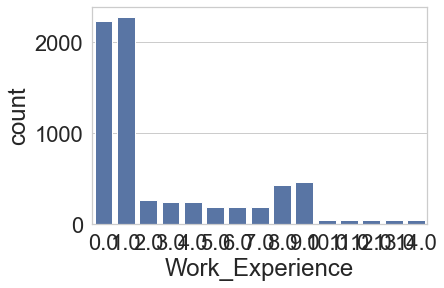

In [28]:
sns.countplot(data=data_for_segmentation, x='Work_Experience',color=sns.color_palette()[0])


## Spending_Score

In [29]:
data_for_segmentation['Spending_Score'].isna().sum()


0

In [30]:
data_for_segmentation['Spending_Score'].unique()


array(['Low', 'High', 'Average'], dtype=object)

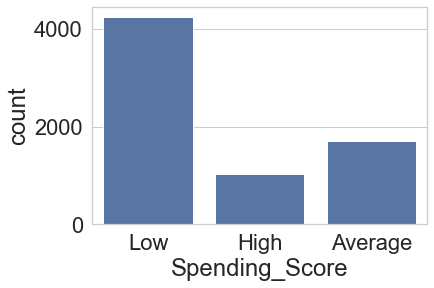

In [31]:
sns.countplot(data=data_for_segmentation, x='Spending_Score',
              color=sns.color_palette()[0])


In [32]:
Spending_Score_Dict = {"Low":0,"Average":1,"High":2}
data_for_segmentation['EncodedSpendingScore'] = data_for_segmentation['Spending_Score'].map(Spending_Score_Dict)


## Family_Size

In [33]:
data_for_segmentation['Family_Size'].isna().sum()


251

In [34]:
data_for_segmentation['Family_Size'].unique()


array([ 4.,  1.,  2.,  3., nan,  5.,  6.,  8.,  7.,  9.])

In [35]:
data_for_segmentation = data_for_segmentation[data_for_segmentation['Family_Size'].notna(
)]


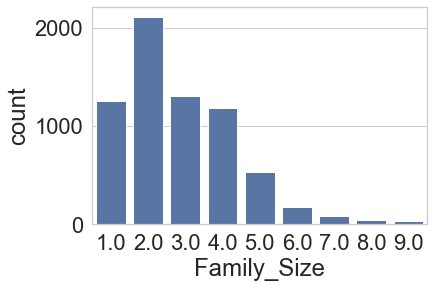

In [36]:
sns.countplot(data=data_for_segmentation, x='Family_Size',
              color=sns.color_palette()[0])


## Var_1

In [37]:
data_for_segmentation['Var_1'].isna().sum()


53

In [38]:
data_for_segmentation['Var_1'].unique()


array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [39]:
data_for_segmentation = data_for_segmentation[data_for_segmentation['Var_1'].notna(
)]


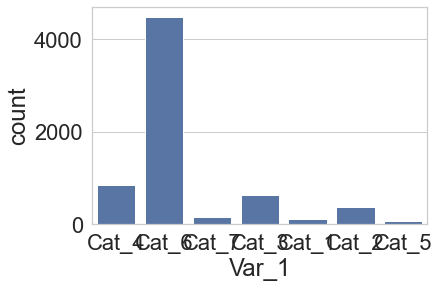

In [40]:
sns.countplot(data=data_for_segmentation, x='Var_1',
              color=sns.color_palette()[0])


##  Missing values, Encoding and Scaling

In [42]:
len(data_for_segmentation)

6665

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled= scaler.fit_transform(data_for_segmentation['Age'])


ValueError: Expected 2D array, got 1D array instead:
array=[22. 67. 67. ... 33. 27. 37.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaled

In [ ]:
data_for_segmentation['Age']

In [ ]:
'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
